In [26]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [70]:
import skimage

image = cv2.imread("building.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # shape: (H, W)
print(image.shape)
image = skimage.measure.block_reduce(image, (16, 16), np.mean).astype(int)
print(image.shape)

(4912, 7360)
(307, 460)


In [99]:
def apply_kernel(img: np.ndarray, kernel: np.ndarray, stride: int = 1):
    orig_image_width = img.shape[1]
    orig_image_height = img.shape[0]
    
    kernel_width = kernel.shape[1]
    kernel_height = kernel.shape[0]
    
    pad_right = orig_image_width % kernel_width
    pad_bottom = orig_image_height % kernel_height
    
    print(f"{orig_image_width=}; {orig_image_height=}")
    print(f"{pad_right=}; {pad_bottom=}")

    img = np.pad(img, ((0, pad_bottom), (0, pad_right)), mode="constant", constant_values=0)
    image_width = img.shape[1]
    image_height = img.shape[0]
    
    output_image = np.zeros((image_height, image_width))
    
    output_img = []
    for i in range(0, image_height, stride):
        if i + kernel_height >= image_height:
            continue
        for j in range(0, image_width, stride):
            if j + kernel_width >= image_width:
                continue
            region = img[i:i + kernel_height, j: j + kernel_width]
            value = np.sum(region * kernel)
            output_img
            output_img.append(value)

    output_img = np.array(output_img)
    output_img.resize(img.shape)
    return output_img

horizontal_kernel = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)

vertical_kernel = np.array([
    [-1,  0,  1],
    [-2,  0,  2],
    [-1,  0,  1]
], dtype=np.float32)

img_after = apply_kernel(image, vertical_kernel)

orig_image_width=460; orig_image_height=307
pad_right=1; pad_bottom=1
3 3


ValueError: operands could not be broadcast together with shapes (3,2) (3,3) 

In [92]:
img_after.shape

(308, 461)

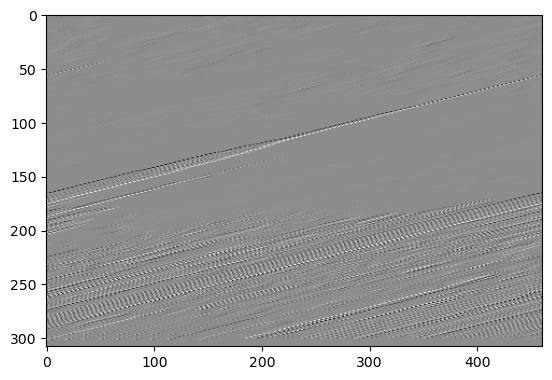

In [96]:
plt.imshow(img_after, cmap='gray')

In [23]:
type(image)

numpy.ndarray